In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix

# pre processamento
from sklearn import preprocessing

# importando dados
dados = pd.read_csv('winequality-white.csv',sep=';',encoding='utf-8')

# tamanho da base
display(dados.shape)

# visualizando
display(dados.head())
#display(dados.describe())

(4898, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
display(dados.describe().T)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


In [3]:
# verificando se tem dados nulos
dados.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

In [4]:
dados['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [5]:
dados.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In [6]:
# conversao valor numerico para categorico
# pessimo: 3-4 bom: 5-6 excelente: 7-9
conditions = [(dados['quality'] >= 7),(dados['quality'] <= 4)]
rating = ['excelente', 'pessimo']
dados['rating'] = np.select(conditions, rating, default='bom')
print(dados.rating.value_counts(),'\n')
print(dados.columns)

bom          3655
excelente    1060
pessimo       183
Name: rating, dtype: int64 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'rating'],
      dtype='object')


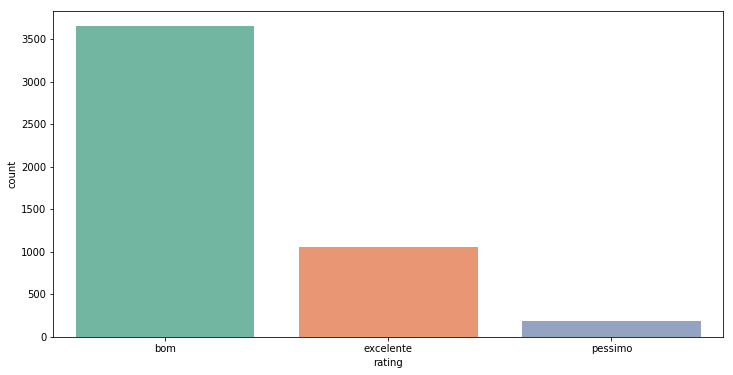

In [7]:
# analise rating categorico
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(ax=ax,x="rating",data=dados,palette="Set2")

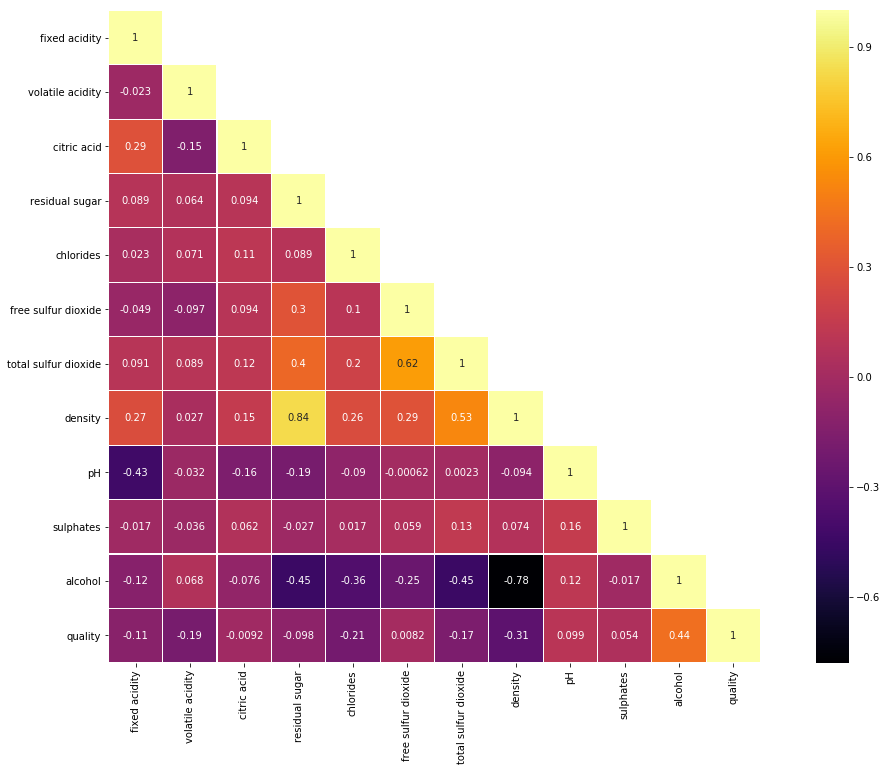

In [8]:
# correlação mapa de calor
correlation = dados.corr()
colormap = plt.cm.inferno
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(20,12)
sns.heatmap(data=correlation ,mask=mask,square=True,annot=True,cbar=True,cmap=colormap, linecolor='White', linewidths=0.1)

In [9]:
# correlacao em numeros
correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

/home/igor/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Wine Ratings'),
 Text(0.5, 0, 'alcohol'),
 Text(0.5, 1.0, 'Alcohol (%) in different types of wine ratings')]

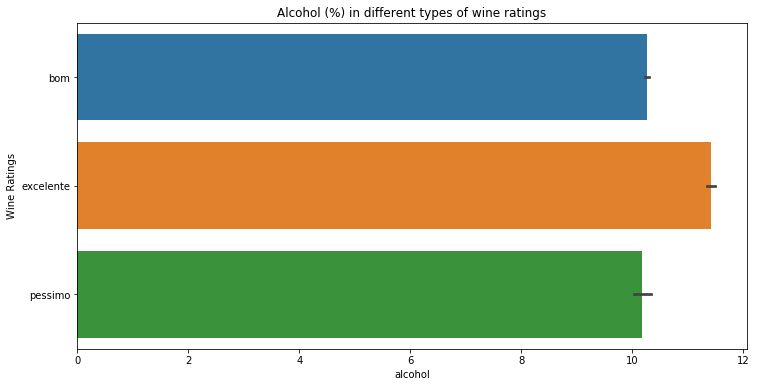

In [10]:
fig, ax = plt.subplots(figsize=(12,6))
#sns.countplot(ax=ax,x="rating",data=dados,palette="Set2")
#bx = sns.swarmplot(x="rating", y="alcohol", data = dados)
bx = sns.barplot(y="rating", x="alcohol", data = dados)
bx.set(ylabel='Wine Ratings', xlabel='alcohol', title='Alcohol (%) in different types of wine ratings')

In [11]:
def rotular(x):
    if x >= 6.5:
        return 1
    elif x < 6.5 :
        return 0
dados['label'] = dados['quality'].apply(rotular)

In [12]:
# removendo quality, rating e label
X = dados.drop(['quality', 'rating', 'label'], axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [13]:
y = dados['label']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=0)

Accuracy = []

classifiers=[GaussianNB(),RandomForestClassifier(n_estimators=10),DecisionTreeClassifier(random_state=0)]
classifiers_names=['Naive Bayes','Floresta Aleatoria','Arvore Decisao']

result = {}

for classifier in range(len(classifiers)):
    c = classifiers[classifier]
    c.fit(X_train,y_train)
    y_predict = c.predict(X_test)
    Accuracy.append(accuracy_score(y_predict,y_test))
     
result={'Algoritmo Classificação':classifiers_names,'Acurácia':Accuracy}

Accuracy_frame=pd.DataFrame(result)
Accuracy_frame

,Algoritmo Classificação,Acurácia
0,Naive Bayes,0.739456
1,Floresta Aleatoria,0.858503
2,Arvore Decisao,0.829932


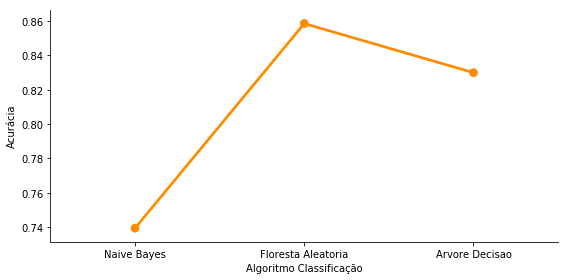

In [15]:
sns.catplot(x='Algoritmo Classificação',y='Acurácia',color="#FF8C00",data=Accuracy_frame,kind='point',height=4,aspect=2)

In [16]:
###### pre processamento ######
X_Scaled = preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled, y, test_size=0.25, random_state=42)

Accuracy = []

classifiers=[GaussianNB(),RandomForestClassifier(n_estimators=41),DecisionTreeClassifier(random_state=42)]
classifiers_names=['Naive Bayes','Floresta Aleatoria','Arvore Decisao']

result = {}

for classifier in range(len(classifiers)):
    c = classifiers[classifier]
    c.fit(X_train,y_train)
    y_predict = c.predict(X_test)
    Accuracy.append(accuracy_score(y_predict,y_test))
     
result={'Algoritmo Classificação':classifiers_names,'Acurácia':Accuracy}

Accuracy_frame=pd.DataFrame(result)
Accuracy_frame

,Algoritmo Classificação,Acurácia
0,Naive Bayes,0.713469
1,Floresta Aleatoria,0.880000
2,Arvore Decisao,0.826939


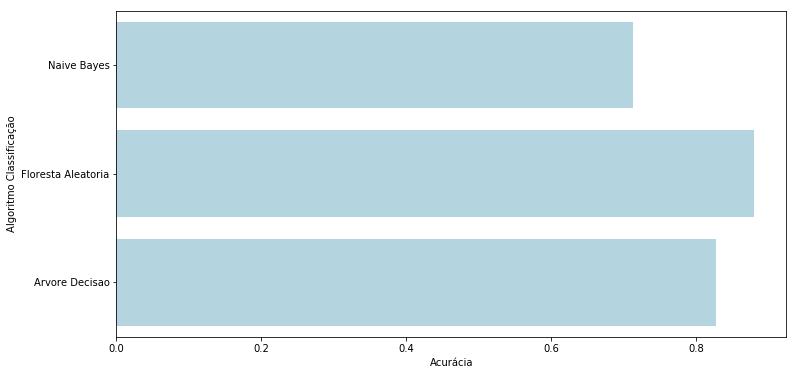

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(ax=ax,y='Algoritmo Classificação',x='Acurácia',data=Accuracy_frame,color="lightblue")

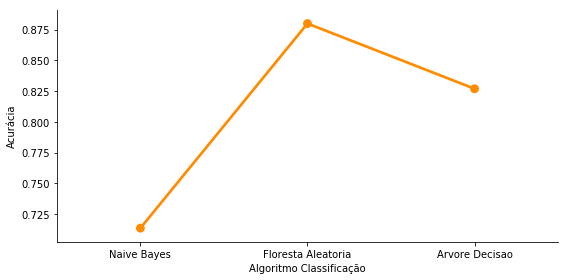

In [19]:
sns.catplot(x='Algoritmo Classificação',y='Acurácia',color="#FF8C00",data=Accuracy_frame,kind='point',height=4,aspect=2)